# Proyek Data Analyst
### by : Dicoding Indonesia

---
* Nama        : Farhan Abyan Putra Karim
* Email       : 2210631250049@student.unsika.ac.id
* ID Dicoding : sherlockh2003

---

### Pertanyaan Bisnis \:
1. Bagaimana performa bisnis bulanan dalam 1 kuartal terakhir ?
2. Apa korelasi antara rental dengan suhu sekitar ?
3. Bagaimana performa bisnis pada hari-hari tertentu ?

---

## Menginstall Library
Ada library yang bukan default milik Google Colab, dan itu harus diinstall terlebih dahulu

In [ ]:
!pip install streamlit

## Mengimpor library

Library yang digunakan :
* Pandas
* NumPy
* Seaborn
* Matplotlib
* Streamlit

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb
import streamlit as st

---
## Data wrangling

### Data Gathering

NOTES! :
Data yang digunakan adalah data [Bike_Dataset](https://drive.google.com/file/d/1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ/view)


Data tersebut disimpan di direktori /data/

In [ ]:
fileDay = pd.read_csv("/data/day.csv")
fileHour = pd.read_csv("/data/hour.csv")

---

### Data Assessment

Mencari:
* Missing Value
* Invalid Value
* Duplicate Data
* Inaccurate Data / Outlier

---
#### Menilai data day.csv

> Jika kode dibawah dijalankan, terlihat bahwa kolom "dteday" masih memiliki data type **object**. Padahal seharusnya **Date**.

> Pada kode dibawah juga terlihat bahwa tiap kolomnya tepat memiliki 731 nilai, tanpa ada data yang NaN atau null

In [ ]:
fileDay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


* Jika kode dibawah dijalankan, ada hal yang aneh pada kolom "hum" dimana nilai minimalnya adalah 0 (dalam bentuk bilangan normal dengan maksimal 100). Hal ini cukup aneh, dikarenakan humiditas tidak mungkin mencapai 0 mutlak. Oleh karenanya ini adalah ***INVALID VALUE*** atau ***MISSING VALUE***

* Selain itu, sebetulnya tidak ada, tapi supaya lebih yakin, kita nanti akan mendeklarasikan ulang kolom "cnt" sebagai :
 ```cnt = casual + registered```
Karena ditakutkan ada data "cnt" yang tidak sesual penjumlahannya, tapi tidak terlihat di ".describe()".

In [ ]:
fileDay.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Jika kode dibawah dijalankan, terlihat bahwa pada tabel fileDay tidak ada data yang duplikat

In [ ]:
fileDay.duplicated().sum()

0

---
#### Menilai data hour.csv

* Jika kode dibawah dijalankan, terlihat bahwa kolom "dteday" masih memiliki data type **object**. Padahal seharusnya **Date**.

* Pada kode dibawah juga terlihat bahwa tiap kolomnya tepat memiliki 731 nilai, tanpa ada data yang NaN atau null

In [ ]:
fileHour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


* Jika kode dibawah dijalankan, ada hal yang aneh pada kolom "hum" dimana nilai minimalnya adalah 0 (dalam bentuk bilangan normal dengan maksimal 100). Hal ini cukup aneh, dikarenakan humiditas tidak mungkin mencapai 0 mutlak. Oleh karenanya ini adalah ***INVALID VALUE*** atau ***MISSING VALUE***

* Selain itu, sebetulnya tidak ada, tapi supaya lebih yakin, kita nanti akan mendeklarasikan ulang kolom "cnt" sebagai :
 ```cnt = casual + registered```
Karena ditakutkan ada data "cnt" yang tidak sesual penjumlahannya, tapi tidak terlihat di ".describe()".

In [ ]:
fileHour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
fileHour[fileHour.atemp == 0]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
480,481,2011-01-22,1,0,1,1,0,6,0,2,0.04,0.0,0.41,0.3881,3,9,12
486,487,2011-01-22,1,0,1,8,0,6,0,1,0.02,0.0,0.44,0.3284,1,26,27


Jika kode dibawah dijalankan, terlihat juga kalau tidak ada data yang duplikat.

In [ ]:
fileHour.duplicated().sum()

0

---
### Data Cleaning

Membersihkan data-data yang kotor pada tabel day.


1. Mendeklarasikan ulang kolom "cnt"
2. Mengisi data "hum" yang invalid
3. Mengganti tipe data "dteday"

In [ ]:
fileDay['cnt'] = fileDay['casual'] + fileDay['registered']
fileDay.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


> Pada kode di bawah, saya pake metode interpolasi linear untuk melakukan prediksi kelembaban udara. Hal ini dikarenakan dataset ini tersusun berdasarkan *time-series* sehingga tidak boleh di drop atau di fill sembarangan.

> [!NOTES] :
>
> Metode interpolasi linear digunakan karena mampu mengestimasi fluktuasi data dengan menarik dua garis lurus antara data disebelahnya. Sehingga tidak terlalu jauh mengubah visualisasi data juga.

In [ ]:
fileDay.hum[fileDay.hum == 0] = np.nan
fileDay.hum.interpolate(method='linear', limit_direction='forward', inplace=True)
fileDay[(fileDay.instant >= 65) & (fileDay.instant <= 74)]

<ipython-input-12-9f313127a537>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fileDay.hum[fileDay.hum == 0] = np.nan
<ipython-input-12-9f313127a537>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
64,65,2011-03-06,1,0,3,0,0,0,2,0.376522,0.366252,0.948261,0.343287,114,491,605
65,66,2011-03-07,1,0,3,0,1,1,1,0.261739,0.238461,0.551304,0.341352,244,1628,1872
66,67,2011-03-08,1,0,3,0,2,1,1,0.292500,0.302400,0.420833,0.120650,316,1817,2133
67,68,2011-03-09,1,0,3,0,3,1,2,0.295833,0.286608,0.775417,0.220150,191,1700,1891
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.712491,0.261877,46,577,623
69,70,2011-03-11,1,0,3,0,5,1,2,0.316522,0.305000,0.649565,0.232970,247,1730,1977
70,71,2011-03-12,1,0,3,0,6,0,1,0.329167,0.325750,0.594583,0.220775,724,1408,2132
71,72,2011-03-13,1,0,3,0,0,0,1,0.384348,0.380091,0.527391,0.270604,982,1435,2417
72,73,2011-03-14,1,0,3,0,1,1,1,0.325217,0.332000,0.496957,0.136926,359,1687,2046
73,74,2011-03-15,1,0,3,0,2,1,2,0.317391,0.318178,0.655652,0.184309,289,1767,2056


Kode di bawah ini menggantikan tipe data dteday menjadi datetime

In [ ]:
fileDay.dteday = pd.to_datetime(fileDay.dteday)
fileDay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

---
Membersihkan data-data yang kotor pada tabel hour.


1. Mendeklarasikan ulang kolom "cnt"
2. Mengisi data "hum" yang invalid
3. Mengganti tipe data "dteday" menjadi datetime

In [ ]:
fileHour["cnt"] = fileHour["casual"] + fileHour["registered"]
fileHour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


> Pada kode di bawah, saya pake metode interpolasi linear untuk melakukan prediksi kelembaban udara. Hal ini dikarenakan dataset ini tersusun berdasarkan *time-series* sehingga tidak boleh di drop atau di fill sembarangan.

> [!NOTES] :
>
> Metode interpolasi linear digunakan karena mampu mengestimasi fluktuasi data dengan menarik dua garis lurus antara data disebelahnya. Sehingga tidak terlalu jauh mengubah visualisasi data juga.

In [ ]:
fileHour.hum[fileHour.hum == 0] = np.nan
fileHour.hum.interpolate(method='linear', limit_direction='forward', inplace=True)
fileHour.describe()

<ipython-input-15-8e7502c3659c>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fileHour.hum[fileHour.hum == 0] = np.nan
<ipython-input-15-8e7502c3659c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.628450,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192009,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Kode di bawah ini menggantikan tipe data dteday menjadi datetime

In [ ]:
fileHour.dteday = pd.to_datetime(fileHour.dteday)
fileHour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

---
## Data Analysis

In [ ]:
fileDay.describe(include="all")
fileHour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.628450,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192009,0.122340,49.305030,151.357286,181.387599


Kelompokkan data jumlah sepeda yang dirental berdasarkan bulan

In [ ]:
fileDay.groupby('mnth').agg({
    'cnt' : ['max', 'min', 'sum']
})

cnt              
       max   min     sum
mnth                    
1     4521   431  134933
2     5062  1005  151352
3     8362   605  228920
4     7460   795  269094
5     8294  2633  331686
6     8120  3767  346342
7     8173  3285  344948
8     7865  1115  351194
9     8714  1842  345991
10    8156    22  322352
11    6852  1495  254831
12    6606   441  211036

Mengelompokkan suhu rata-rata bulanan, dengan agregat rental sepeda

In [ ]:
fileDay.groupby('season').agg({
    'temp' : 'mean',
    'atemp' : 'mean',
    'hum' : 'mean',
    'cnt' : 'sum'
})

,temp,atemp,hum,cnt
season,,,,
1,0.297748,0.296914,0.586839,471348
2,0.544405,0.520307,0.626948,918589
3,0.706309,0.655898,0.633482,1061129
4,0.422906,0.415539,0.668719,841613


Mengelompokkan temperatur, temperatur yang dirasakan, dan kelembaban berdasarkan musim

In [ ]:
fileDay.groupby('season').agg({
    'temp': ['min', 'max', 'mean'],
    'atemp': ['min', 'max', 'mean'],
    'hum': ['min', 'max', 'mean']
})

temp                         atemp                           hum  \
             min       max      mean       min       max      mean       min   
season                                                                         
1       0.059130  0.572500  0.297748  0.079070  0.548617  0.296914  0.187917   
2       0.253043  0.808333  0.544405  0.250339  0.757579  0.520307  0.254167   
3       0.469167  0.861667  0.706309  0.242400  0.840896  0.655898  0.360000   
4       0.220833  0.657500  0.422906  0.227913  0.607975  0.415539  0.333478   

                            
             max      mean  
season                      
1       0.948261  0.586839  
2       0.922500  0.626948  
3       0.939565  0.633482  
4       0.972500  0.668719

Mengelompokkan kondisi harian, dengan agregat rental sepeda

In [ ]:
fileDay.groupby('weekday').agg({
    'cnt' : 'sum'
})

,cnt
weekday,
0,444027
1,455503
2,469109
3,473048
4,485395
5,487790
6,477807


Jumlah sepeda yang dipinjam pada hari libur dan hari biasa

In [ ]:
fileDay.groupby(['weekday','holiday']).agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

casual  registered     cnt
weekday holiday                            
0       0        140521      303506  444027
1       0         54024      341874  395898
        1         16760       42845   59605
2       0         57403      410693  468096
        1           440         573    1013
3       0         54757      410888  465645
        1          2562        4841    7403
4       0         59945      421530  481475
        1          1515        2405    3920
5       0         77156      404140  481296
        1          1082        5412    6494
6       0        153852      323955  477807

Mengelompokkan durasi jam rental harian berdasarkan hari

In [ ]:
fileHour.groupby(['weekday','holiday']).agg({
    'hr' : 'mean',
    'cnt' : 'mean'
})

hr         cnt
weekday holiday                       
0       0        11.555156  177.468825
1       0        11.554665  186.568332
        1        11.568627  166.960784
2       0        11.619753  192.632099
        1        11.869565   44.043478
3       0        11.527540  189.981640
        1        11.500000  308.458333
4       0        11.557161  198.710277
        1        11.500000   81.666667
5       0        11.528495  197.333333
        1        11.500000  135.291667
6       0        11.483678  190.209793

## Data Visualization

### Data Rename

Untuk memudahkan pemahaman pengguna, label-label pada data, diubah mengikuti kondisi yang paling mudah dipahami

In [ ]:
fileDay.rename(columns={
    'dteday' : 'date',
    'yr' : 'year',
    'mnth' : 'month',
    'weekday' : 'day',
    'workingday' : 'workday',
    'weathersit' : 'weather',
    'temp' : 'temperature',
    'hum' : 'humidity',
    'cnt' : 'count'
}, inplace=True)


fileHour.rename({
    'dteday' : 'date',
    'yr' : 'year',
    'mnth' : 'month',
    'hr' : 'hour',
    'weekday' : 'day',
    'workingday' : 'workday',
    'weathersit' : 'weather',
})

fileDay['month'] = fileDay.month.map({
    1 : 'January',
    2 : 'February',
    3 : 'March',
    4 : 'April',
    5 : 'May',
    6 : 'June',
    7 : 'July',
    8 : 'August',
    9 : 'September',
    10 : 'October',
    11 : 'November',
    12 : 'December'
})

fileDay['day'] = fileDay.day.map({
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday'
})

fileHour['weekday'] = fileHour.weekday.map({
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday'
})


fileDay['weather'] = fileDay.weather.map({
    1 : 'Clear',
    2 : 'Misty',
    3 : 'Light Storm',
    4 : 'Heavy Storm'
})

fileDay.describe()

,instant,date,season,year,month,holiday,day,workday,temperature,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731,731.000000,731.000000,0.0,731.000000,0.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,NaN,0.028728,NaN,0.683995,0.495385,0.474354,0.628869,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,NaN,0.000000,NaN,0.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,NaN,0.000000,NaN,0.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,NaN,0.000000,NaN,1.000000,0.498333,0.486733,0.627500,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,NaN,0.000000,NaN,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,NaN,1.000000,NaN,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,NaN,0.167155,NaN,0.465233,0.183051,0.162961,0.140552,0.077498,686.622488,1560.256377,1937.211452


---
### Data jumlah rental tiap waktu

<ipython-input-25-a456a70ee866>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  casual = fileDay.groupby('month')['casual'].sum()
<ipython-input-25-a456a70ee866>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  registered = fileDay.groupby('month')['registered'].sum()


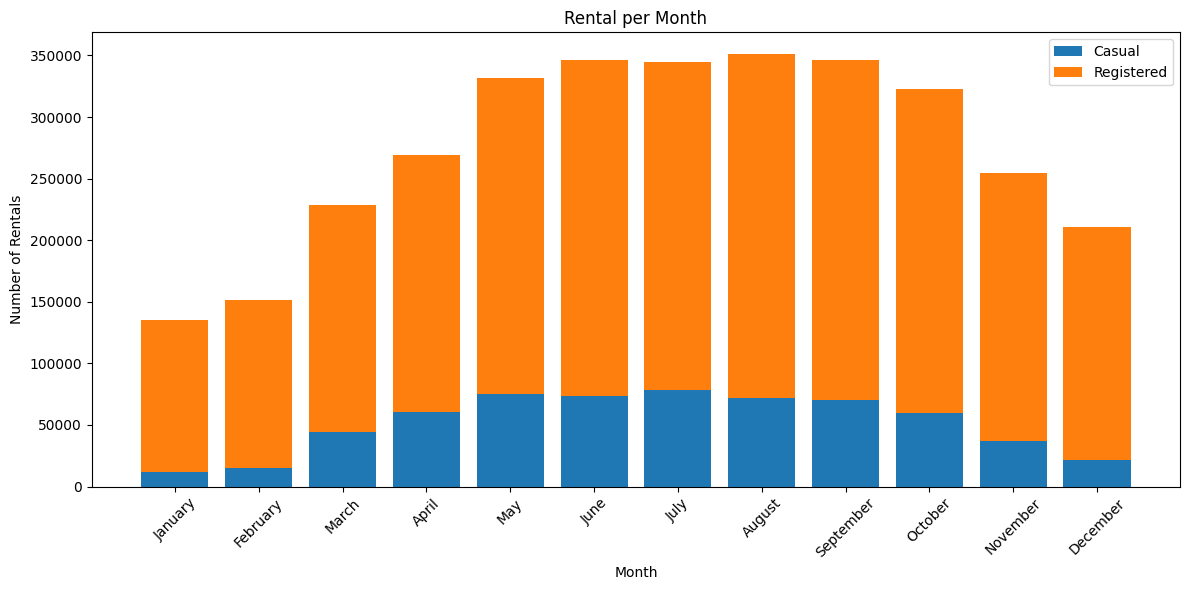

In [ ]:
order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

fileDay['month'] = pd.Categorical(fileDay['month'], categories=order, ordered=True)

mp.figure(figsize=(12, 6))
mp.title('Rental per Month')

casual = fileDay.groupby('month')['casual'].sum()
registered = fileDay.groupby('month')['registered'].sum()

mp.bar(casual.index, casual.values, label='Casual')
mp.bar(registered.index, registered.values, bottom=casual.values, label='Registered')

mp.xlabel('Month')
mp.xticks(rotation=45)
mp.ylabel('Number of Rentals')
mp.legend()
mp.tight_layout()
mp.show()

### Data hubungan cuaca dengan rental

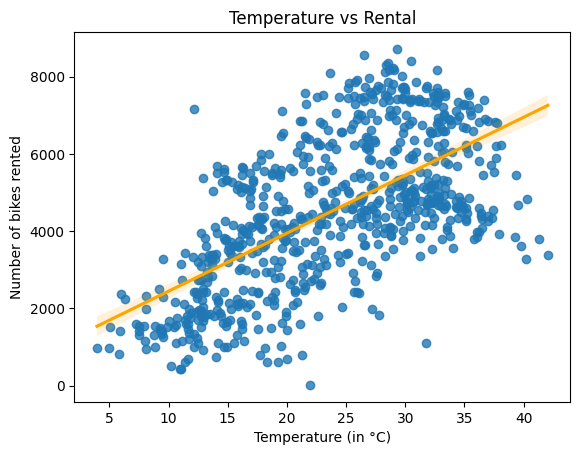

In [35]:
mp.title('Temperature vs Rental')
temper = fileDay['temperature'] * 41
count = fileDay['count']
mp.subplot()
sb.regplot(
    x=atemper,
    y=count,
    scatter=True,
    line_kws={"color": "orange"}
)
mp.xlabel("Temperature (in °C)")
mp.ylabel("Number of bikes rented")
mp.show()

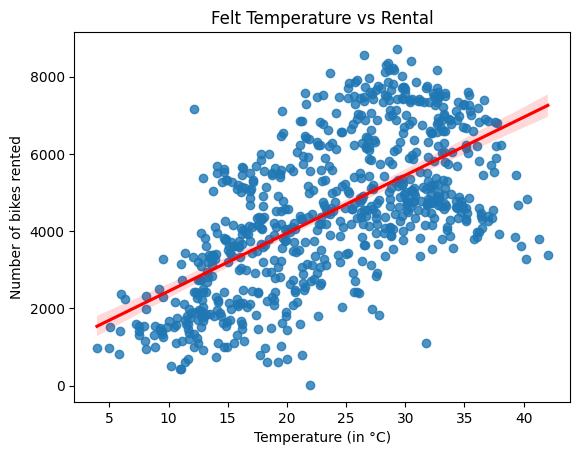

In [36]:
mp.title('Felt Temperature vs Rental')
atemper = fileDay['atemp'] * 50
count = fileDay['count']
mp.subplot()
sb.regplot(
    x=atemper,
    y=count,
    scatter=True,
    line_kws={"color": "red"}
)
mp.xlabel("Temperature (in °C)")
mp.ylabel("Number of bikes rented")
mp.show()

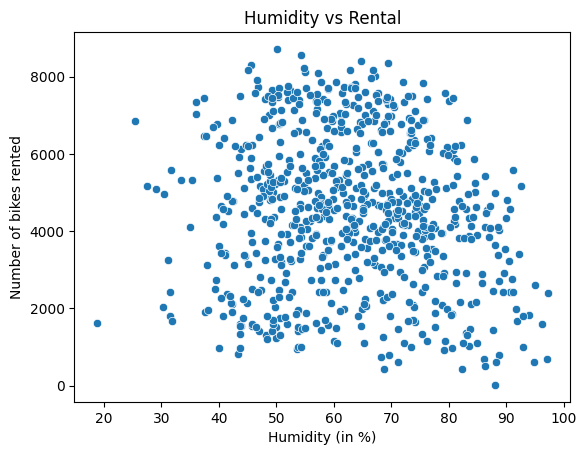

In [ ]:
mp.title('Humidity vs Rental')
humid = fileDay['humidity'] * 100
count = fileDay['count']
mp.subplot()
sb.scatterplot(
    x=humid,
    y=count
)
mp.xlabel("Humidity (in %)")
mp.ylabel("Number of bikes rented")
mp.show()

## Save To CSV again

In [ ]:
fileDay.to_csv('/dashboard/day.csv')
fileHour.to_csv('/dashboard/hour.csv')